In [16]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [17]:
USE_CUDA=torch.cuda.is_available()
device=torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습함", device)

random.seed(777)
torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    

training_epochs=15
batch_size=100


다음 기기로 학습함 cpu


In [18]:
mnist_train=dsets.FashionMNIST(root="FashionMNIST_data/", train=True, transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.FashionMNIST(root="FashionMNIST_data/", train=False, transform=transforms.ToTensor(),
                        download=True)

In [19]:
data_loader=DataLoader(dataset=mnist_train, #훈련데이터
                       batch_size=batch_size, # 배치의 크기
                       shuffle=True, # 매 에포크마다 미니배치를 서플할 것인가?
                       drop_last=True #마지막 배치를 버릴 것인가?
                       )


In [20]:
for X, Y in data_loader:
    x=X.view(-1,28 * 28).to(device)
    print(x)
    # y=Y.to(device)
    # print(y)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0863, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0

In [21]:
# MNIST_data size(28 * 28 = 784)
linear=nn.Linear(784,10,bias=True).to(device)

In [22]:
crit=nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(linear.parameters(),lr=0.1)

In [23]:
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=len(data_loader)
    
    for X, Y in data_loader:
        # 배치크기가 100, X(100,784)
        X=X.view(-1,28 * 28).to(device)
        Y=Y.to(device)

        optimizer.zero_grad()
        y_hat=linear(X)

        cost=crit(y_hat,Y)

        cost.backward()
        optimizer.step()

        avg_cost+=cost/total_batch

    print('Epoch=%d, cost=%.9f' %(epoch,avg_cost))
print('End')

Epoch=0, cost=0.662584841
Epoch=1, cost=0.509687483
Epoch=2, cost=0.477819294
Epoch=3, cost=0.460190296
Epoch=4, cost=0.450577915
Epoch=5, cost=0.439607292
Epoch=6, cost=0.435234457
Epoch=7, cost=0.429969937
Epoch=8, cost=0.425882697
Epoch=9, cost=0.421166480
Epoch=10, cost=0.419846445
Epoch=11, cost=0.417389661
Epoch=12, cost=0.414374173
Epoch=13, cost=0.412794322
Epoch=14, cost=0.410526931
End


In [24]:
X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
Y_test = mnist_test.test_labels.to(device)

prediction = linear(X_test)
correct_prediction = torch.argmax(prediction,1) == Y_test
accuracy = correct_prediction.float().mean()
print('Accuracy:', accuracy.item())

Accuracy: 0.7670000195503235


3757
Lable tensor([8])
prediction:  8


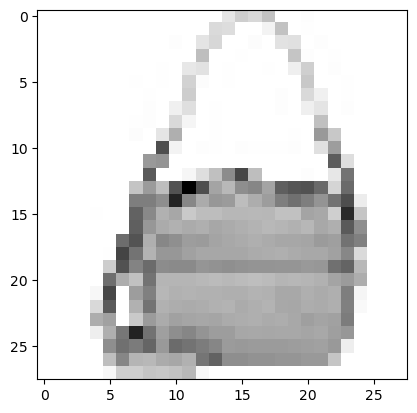

In [25]:
r=random.randint(0,len(mnist_test)-1)
print(r)
X_single_data=mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
Y_single_data=mnist_test.test_labels[r:r+1].to(device)

print("Lable",Y_single_data)
single_prediction=linear(X_single_data)
print("prediction: ",torch.argmax(single_prediction,1).item())
plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap='Greys', interpolation='nearest')
plt.show()

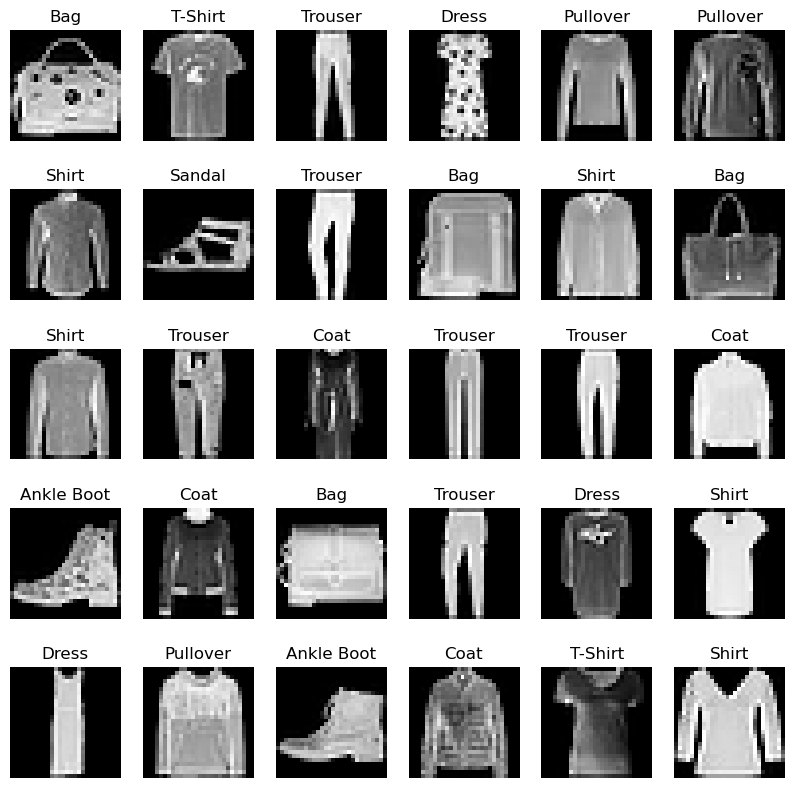

In [26]:
lables_map = {
    0: 'T-Shirt', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt',
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}
cols, rows = 6, 5
figure = plt.figure(figsize=(10,10))

for i in range(1, cols*rows+1):
    sample_idx=torch.randint(len(mnist_train), size=(1,)).item()
    img, label=mnist_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(lables_map[label])
    plt.axis('off')
    plt.imshow(torch.permute(img,(1,2,0)), cmap="gray")
plt.show()